In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# the four dimension are training dataset rows, 32*32 pixels and 3 means the RGB color
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
image0 = X_train[0]
image1 = X_train[1]

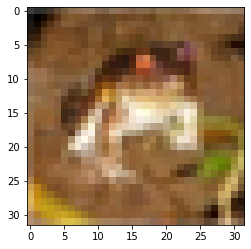

In [7]:
plt.imshow(image0, cmap='Greys')

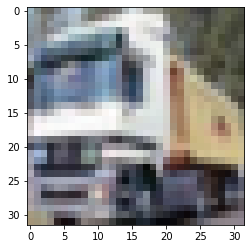

In [8]:
plt.imshow(image1, cmap='Greys')

Only the second one is a truck I guess?

In [9]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [10]:
# there are 10 classes 
print(y_cat_train.shape)
print(y_cat_test.shape)

(50000, 10)
(10000, 10)


In [11]:
# scale the image because value only range from 0-255
# divide by 255 can make all numbers range from 0-1
X_train = X_train/255 
X_test = X_test/255

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [13]:
model = Sequential()

# convolution part
# model.add(Conv2D(filters=32, kernel_size= (4,4), input_shape =(32,32,1), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Flatten())

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

# ANN
model.add(Dense(256, activation='relu'))

# ANN output
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [16]:
model.fit(X_train, y_cat_train, epochs = 10, validation_data=(X_test,y_cat_test), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 362s 231ms/step - loss: 1.8023 - accuracy: 0.3320 - val_loss: 1.1431 - val_accuracy: 0.5942
Epoch 2/10
1563/1563 [==============================] - 358s 229ms/step - loss: 1.0421 - accuracy: 0.6264 - val_loss: 0.9001 - val_accuracy: 0.6833
Epoch 3/10
1563/1563 [==============================] - 358s 229ms/step - loss: 0.7982 - accuracy: 0.7170 - val_loss: 0.8143 - val_accuracy: 0.7195
Epoch 4/10
1563/1563 [==============================] - 358s 229ms/step - loss: 0.6384 - accuracy: 0.7741 - val_loss: 0.7398 - val_accuracy: 0.7396
Epoch 5/10
1563/1563 [==============================] - 360s 231ms/step - loss: 0.5396 - accuracy: 0.8089 - val_loss: 0.7614 - val_accuracy: 0.7498


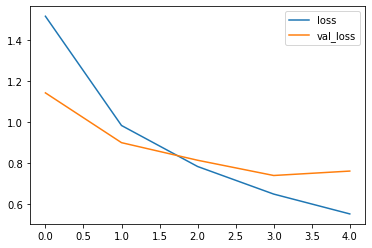

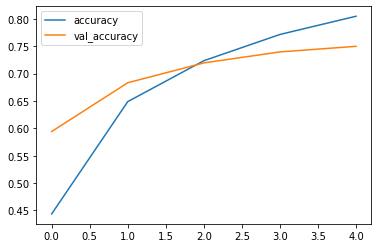

In [17]:
metrics = pd.DataFrame(model.history.history)
metrics
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [18]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.7614005208015442, 0.7498000264167786]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1000
           1       0.86      0.88      0.87      1000
           2       0.58      0.73      0.64      1000
           3       0.61      0.54      0.57      1000
           4       0.75      0.65      0.69      1000
           5       0.73      0.61      0.66      1000
           6       0.88      0.75      0.81      1000
           7       0.76      0.83      0.79      1000
           8       0.85      0.83      0.84      1000
           9       0.87      0.82      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [22]:
print(confusion_matrix(y_test, y_pred))

[[867   8  47   7  14   2   2   8  31  14]
 [ 18 881   5   4   2   2   3   1  28  56]
 [ 77   6 726  36  49  28  27  38   7   6]
 [ 42   8 121 542  48 124  27  54  21  13]
 [ 25   7 127  30 649  25  33  86  12   6]
 [ 24   4  77 165  39 607   7  61  11   5]
 [ 18   9  81  70  33  10 747   8  20   4]
 [ 23   4  54  19  27  31   2 834   2   4]
 [100  21  16   7   3   1   0   6 827  19]
 [ 56  74   6  10   5   5   4   4  18 818]]


In [23]:
my_image = X_test[16]
my_image.shape

(32, 32, 3)

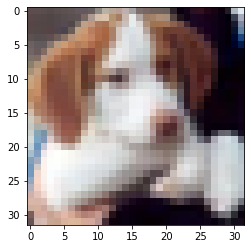

In [24]:
plt.imshow(my_image.reshape(32,32,3))

In [25]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])

In [26]:
y_test[16]

array([5], dtype=uint8)